# Analytical Engine

### - Algorithms for Analyzing the student perfomance and providing Recommendations to improve accuracy

# 

In [12]:
import json 
# Importing json module, so that we can use it to read and parse json files.

In [2]:
# Loading Json Data

with open(r"C:\Users\rravi\Downloads\strapi-admin-panel.basic_analyses.json") as f:
    basic_data=json.load(f)
    
with open(r"C:\Users\rravi\Downloads\strapi-admin-panel.detailed_analyses.json") as f:
    detailed_data=json.load(f)

In [3]:
#   Student accuracy for all the subjects  VS  Date of the test to analyse if accuracies are falling or inconsistent for a subject
#   or particular group of subjects

accuracy_trend_data=[]
def accuracy_trend():
    for test in basic_data:
        test_date=test["submittedAt"]["$date"]
        subjects=test["subjects"]
        for subject in subjects:
            subject_id=subject["subjectId"]["$oid"]
            subject_accuracy=subject["accuracy"]
            data=[subject_id, subject_accuracy, test_date[0:10]]
            accuracy_trend_data.append(data)
                
    
accuracy_trend() 

In [4]:
## No. Of Missing concepts in each subject vs subject.
missing_concept_analysis_data={}
def missing_concepts_analysis():
    for test in detailed_data:
        subjects=test["subjects"]
        for subject in subjects:
            subject_id=subject["subjectId"]["$oid"]
            no_of_missed_concepts=len(subject["missedConcepts"])
            if subject_id in missing_concept_analysis_data:
                missing_concept_analysis_data[subject_id]+=1
            else:
                missing_concept_analysis_data[subject_id]=1
missing_concepts_analysis()

In [5]:
## In which of the easy, moderate, or tough, the student is scoring more negatives in each subject?
subject_wise_negative_analysis_data={}

def subject_wise_negative_analysis():
    for test in detailed_data:
        subjects=test["subjects"]
        for subject in subjects:
            easy_incorrect=subject["easyIncorrect"]
            moderate_incorrect=subject["moderateIncorrect"]
            tough_incorrect=subject["toughIncorrect"]
            totalIncorrect=easy_incorrect+moderate_incorrect+tough_incorrect
            subject_id=subject["subjectId"]["$oid"]
            if subject_id in subject_wise_negative_analysis_data:
                subject_wise_negative_analysis_data[subject_id]["easyIncorrect"]+=easy_incorrect
                subject_wise_negative_analysis_data[subject_id]["moderateIncorrect"]+=moderate_incorrect
                subject_wise_negative_analysis_data[subject_id]["toughIncorrect"]+=tough_incorrect
                subject_wise_negative_analysis_data[subject_id]["totalIncorrect"]+=totalIncorrect
            else:
                subject_wise_negative_analysis_data[subject_id]={}
                subject_wise_negative_analysis_data[subject_id]["easyIncorrect"]=easy_incorrect
                subject_wise_negative_analysis_data[subject_id]["moderateIncorrect"]=moderate_incorrect
                subject_wise_negative_analysis_data[subject_id]["toughIncorrect"]=tough_incorrect
                subject_wise_negative_analysis_data[subject_id]["totalIncorrect"]=totalIncorrect
                
subject_wise_negative_analysis()


In [6]:
## Accuracy vs Confused Times and OverTime Attempts in tests.
subject_wise_oveviewAndConfused_data_analysis={}
def over_time_attempts_vs_accuracy():
    for test in detailed_data:
        
        subjects=test["subjects"]
        for subject in subjects:
            subject_id=subject["subjectId"]["$oid"]
            over_time_questions=subject["overtimeAttempts"]
            confused_questions=subject["confusedAttempts"]
            if subject_id in subject_wise_oveviewAndConfused_data_analysis:
                subject_wise_oveviewAndConfused_data_analysis[subject_id]["overtime"]+=over_time_questions
                subject_wise_oveviewAndConfused_data_analysis[subject_id]["confused"]+=confused_questions 
            else:
                subject_wise_oveviewAndConfused_data_analysis[subject_id]={}
                subject_wise_oveviewAndConfused_data_analysis[subject_id]["overtime"]=over_time_questions
                subject_wise_oveviewAndConfused_data_analysis[subject_id]["confused"]=confused_questions
over_time_attempts_vs_accuracy()

In [7]:
## For false questions average time vs True questiosn average Time.

time_taken_false_question_choice=[]
time_taken_false_question_numerical=[]
time_taken_true_question_numerical=[]
time_taken_true_question_choice=[]

def time_analysis_vs_false_questions():
    for test in basic_data:
        sections=test["sections"]
        for section in sections:
            questions=section["questions"]
            n=len(questions)
            for question in questions:
                if question["status"]=="answered":
                    if question["inputValue"]["value"] is not None and question["inputValue"]["isCorrect"]==True:
                        time_taken_true_question_numerical.append({"numerical":question["timeTaken"]})
                        
                    elif question["inputValue"]["value"]is not None and question["inputValue"]["isCorrect"]==False:
                     
                        time_taken_false_question_numerical.append({"numerical":question["timeTaken"]}) 
                    elif question["markedOptions"][0]["isCorrect"]==True:
                        time_taken_true_question_choice.append({"choice":question["timeTaken"]})
                       
                    else:
                        
                        time_taken_false_question_choice.append({"choice":question["timeTaken"]})
time_analysis_vs_false_questions()                    

# Reports 

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


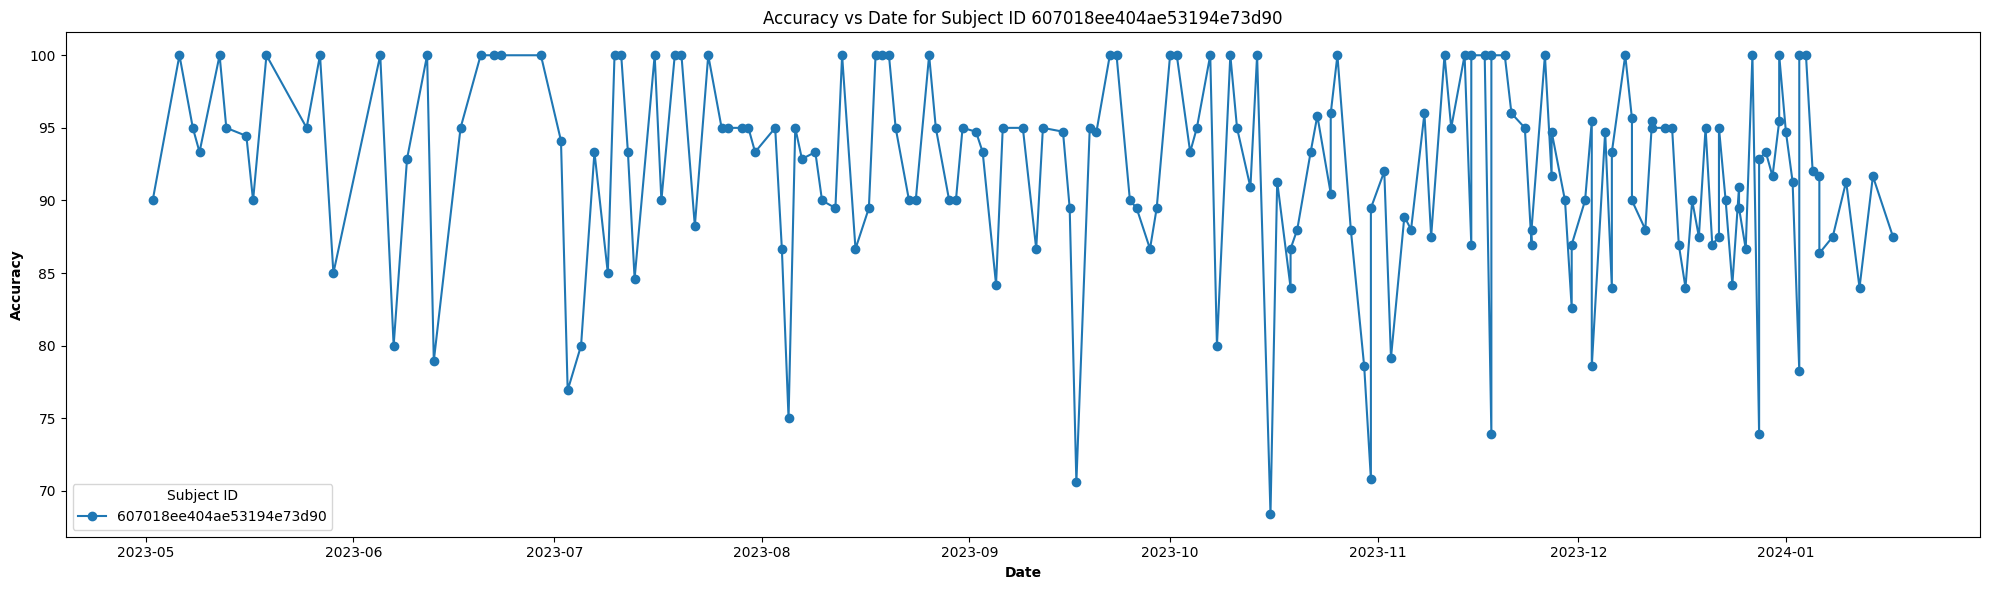

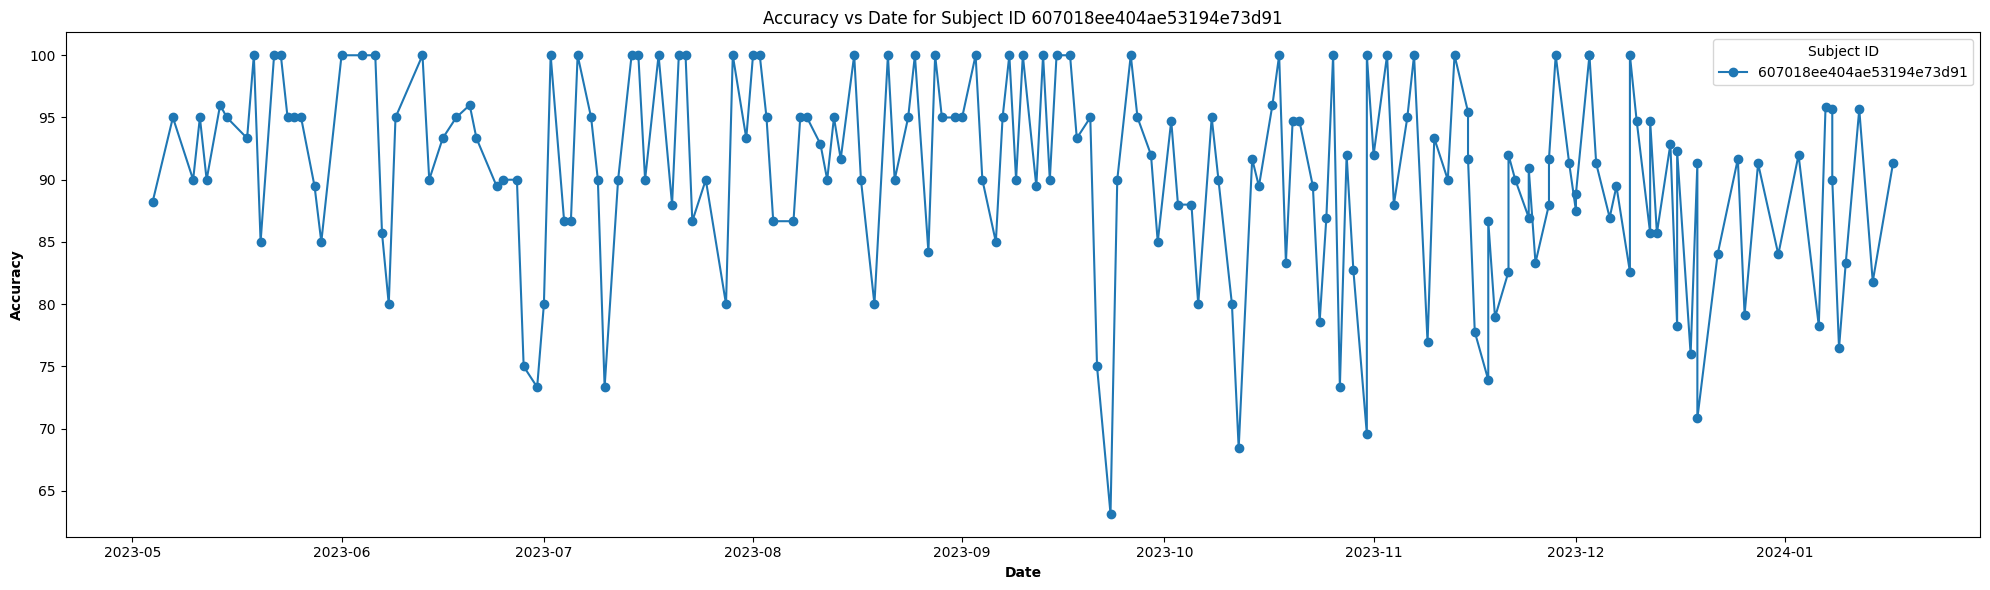

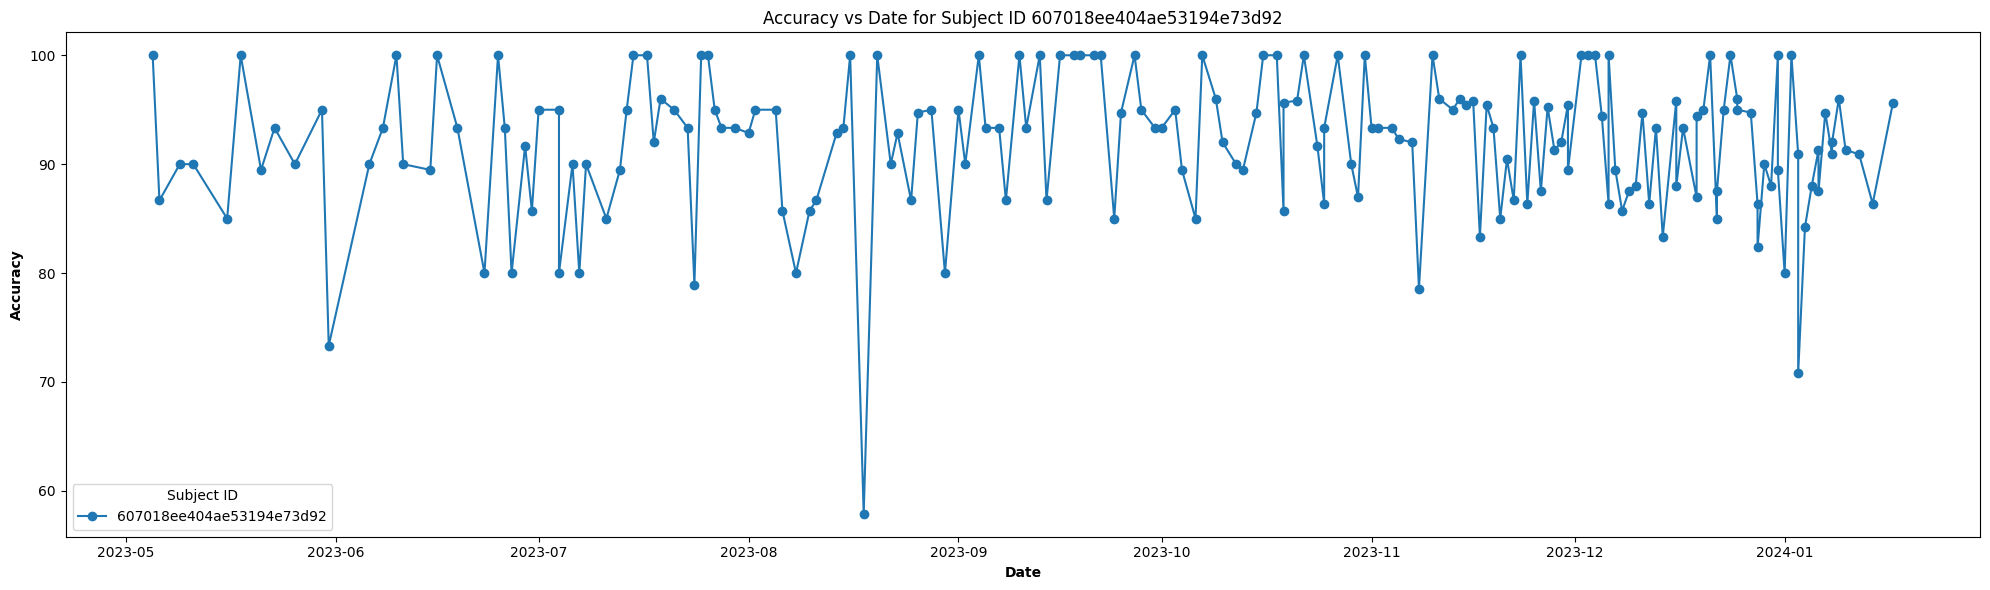

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Sample data
data = accuracy_trend_data

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data, columns=['subject_id', 'accuracy', 'date'])

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Plotting each subject_id in a separate chart
for subject_id in df['subject_id'].unique():
    subject_data = df[df['subject_id'] == subject_id]
    
    plt.figure(figsize=(20, 6))
    plt.plot(subject_data['date'], subject_data['accuracy'], marker='o', label=subject_id)
    
    # Add labels and title
    plt.xlabel('Date', fontweight='bold')
    plt.ylabel('Accuracy', fontweight='bold')
    plt.title(f'Accuracy vs Date for Subject ID {subject_id}')
    
    # Add legend
    plt.legend(title='Subject ID')
    
    # Display the plot
    plt.tight_layout()
    plt.show()


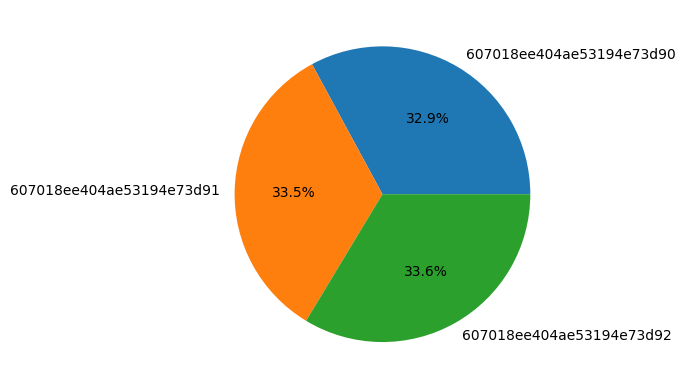

In [18]:
## Missing Concepts vs Subjects

subjects=missing_concept_analysis_data.keys()
missingconcepts=[missing_concept_analysis_data[subject] for subject in subjects]

plt.pie(missingconcepts,labels=subjects,autopct='%1.1f%%')

plt.show()

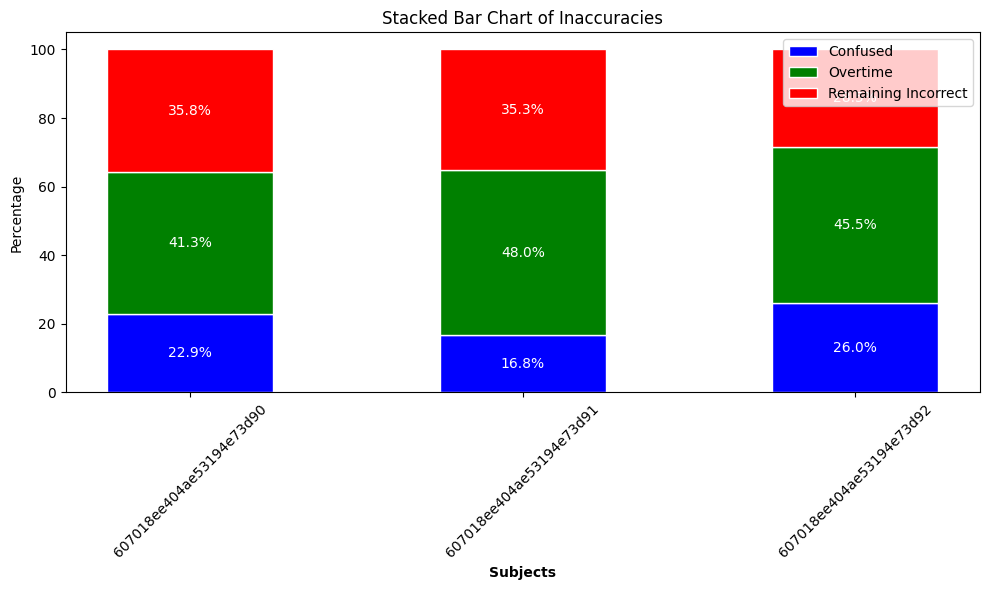

In [19]:
## Analysing which attempts causing more Inaccuracies.

subjects = list(subject_wise_oveviewAndConfused_data_analysis.keys())
confused = [subject_wise_oveviewAndConfused_data_analysis[subject]['confused'] for subject in subjects]
overtime = [subject_wise_oveviewAndConfused_data_analysis[subject]['overtime'] for subject in subjects]
totalIncorrect = [subject_wise_negative_analysis_data[subject]['totalIncorrect'] for subject in subjects]
remainingIncorrect=[ subject_wise_negative_analysis_data[subject]['totalIncorrect']-subject_wise_oveviewAndConfused_data_analysis[subject]['confused']-subject_wise_oveviewAndConfused_data_analysis[subject]['overtime'] for subject in subjects ]


confused_percent = [confused[i] / totalIncorrect[i] * 100 for i in range(len(subjects))]
overtime_percent = [overtime[i] / totalIncorrect[i] * 100 for i in range(len(subjects))]
remainingIncorrect_percent = [remainingIncorrect[i] / totalIncorrect[i] * 100 for i in range(len(subjects))]

# Positions of the bars
barWidth = 0.5
r = np.arange(len(subjects))

# Plotting the bars
plt.figure(figsize=(10, 6))
plt.bar(r, confused_percent, color='b', edgecolor='white', width=barWidth, label='Confused')
plt.bar(r, overtime_percent, bottom=confused_percent, color='g', edgecolor='white', width=barWidth, label='Overtime')
plt.bar(r, remainingIncorrect_percent, bottom=np.array(confused_percent) + np.array(overtime_percent), color='r', edgecolor='white', width=barWidth, label='Remaining Incorrect')

# Adding labels with percentages
for i in range(len(subjects)):
    plt.text(r[i], confused_percent[i] / 2, f"{confused_percent[i]:.1f}%", ha='center', va='center', color='white')
    plt.text(r[i], confused_percent[i] + overtime_percent[i] / 2, f"{overtime_percent[i]:.1f}%", ha='center', va='center', color='white')
    plt.text(r[i], confused_percent[i] + overtime_percent[i] + remainingIncorrect_percent[i] / 2, f"{remainingIncorrect_percent[i]:.1f}%", ha='center', va='center', color='white')

# Adding labels
plt.xlabel('Subjects', fontweight='bold')
plt.xticks(r, subjects, rotation=45)
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Inaccuracies')

# Adding legend
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
time_taken_false_question_choice
time_taken_false_question_numerical
time_taken_true_question_numerical
time_taken_true_question_choice

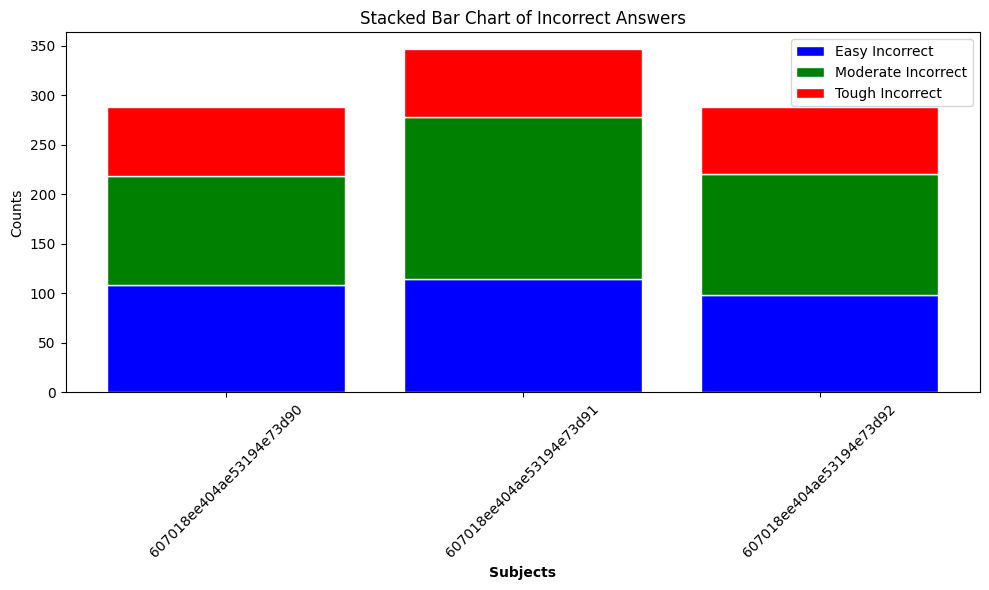

In [20]:
## Analysing which level of questions the student is facing accuracy:
data=subject_wise_negative_analysis_data
subjects = list(data.keys())
easy_incorrect = [data[subject]['easyIncorrect'] for subject in subjects]
moderate_incorrect = [data[subject]['moderateIncorrect'] for subject in subjects]
tough_incorrect = [data[subject]['toughIncorrect'] for subject in subjects]

# Positions for bars
r = np.arange(len(subjects))

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(r, easy_incorrect, color='b', edgecolor='white', label='Easy Incorrect')
plt.bar(r, moderate_incorrect, bottom=easy_incorrect, color='g', edgecolor='white', label='Moderate Incorrect')
plt.bar(r, tough_incorrect, bottom=np.array(easy_incorrect) + np.array(moderate_incorrect), color='r', edgecolor='white', label='Tough Incorrect')

# Adding labels and title
plt.xlabel('Subjects', fontweight='bold')
plt.ylabel('Counts')
plt.title('Stacked Bar Chart of Incorrect Answers')
plt.xticks(r, subjects, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()